# Simulating a model with GINsim, bioLQM and MaBoSS

This notebook can be launched using the Docker image of CoLoMoTo:

    $docker pull colomoto/colomoto-docker

or by creating a conda environment with the following command:

    $conda create -n myenv -c colomoto ginsim-python pymaboss -c potassco

To launch this notebook, type the command:

    $jupyter notebook

In [1]:
# Set up working environment for CoLoMoTo
import ginsim
import biolqm
import maboss
from colomoto_jupyter import tabulate
# for fixpoint table display
from itertools import combinations
# for iterating over sets
import matplotlib.pyplot as plt
# for modifying plots

## GINsim

Visualize the GINsim network if available and the stable states of the model

In [2]:
model_ginsim = ginsim.load("circuits.zginml")

In [3]:
ginsim.show(model_ginsim)

## bioLQM

In [4]:
## Use biolqm to visualize the stable states
model_biolqm = ginsim.to_biolqm(model_ginsim) # convert to biolqm

## Compute fixpoints
fps = biolqm.fixpoints(model_biolqm)
print(len(fps), "fixpoints") # shows the number of fixpoints
tabulate(fps) # table displaying all the fixpoints

1 fixpoints


,GeneA,GeneB,GeneC
0,0,1,0


## MaBoSS

If you have exported the model in MaBoSS, you can run the model directly with the two files used in MaBoSS simulations. The files used are:
*model.bnd* and *model.cfg*

In [ ]:
## Set up the required files
#bnd_file ="model.bnd"
#cfg_WT = "model.bnd.cfg"

#WT_allinputs = maboss.load("filename.bnd", "filename.cfg").run()

When you load the model from bioLQM, you may need to modify some configuration parameters. 

Note that if you used the export of GINsim export, all the initial values will be set to 0 and all variables will be external values, which may lead to computational explosion if you have many nodes in your network.

In [5]:
model_maboss = biolqm.to_maboss(model_biolqm) # convert to maboss
model_maboss.update_parameters(sample_count=5000,max_time=20, time_tick=0.1)

Select the read-outs from the nodes of the model

In [6]:
## Select outputs for visualisation of the results
model_maboss.network.set_output(('GeneA','GeneB','GeneC'))

In [7]:
## Run a MaBoSS simulation
run_model_maboss = model_maboss.run()

Text(0.5, 1.0, 'Combined circuit pie chart')

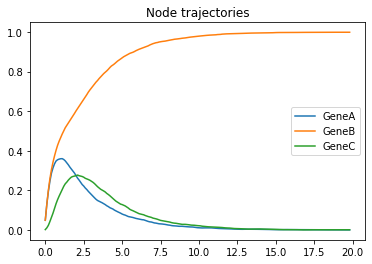

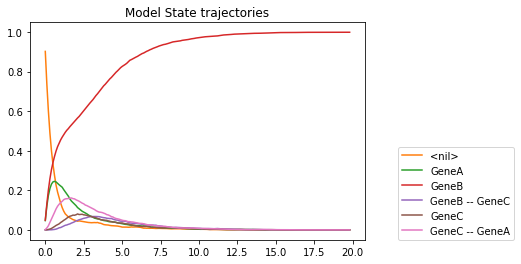

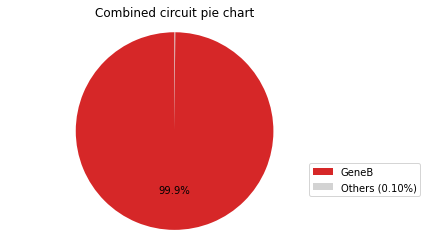

In [8]:
## Plot the results of the WT simulation
run_model_maboss.get_nodes_probtraj().plot(legend=True)
plt.title('Node trajectories')
run_model_maboss.plot_trajectory(legend=True)
plt.title('Model State trajectories')

## Note that the model state <nil> means that none of the external variables are ON. 

# Plot pie chart
run_model_maboss.plot_piechart()
plt.title('Combined circuit pie chart')

## You may want to save the figure
# figure = run_model_maboss.get_states_probtraj().plot()
# save_figure(figure, 'Model_states')


## Simulations of different cell conditions

Set all inputs at random values 

In [9]:
# Set conditions for simulations

##### Set some nodes to 0 as initial conditions #####
## if all nodes are random and you wish to set only the initial conditions and outputs to 0
#WT_allinputs0 = maboss.copy_and_update_parameters(WT, {'max_time':50})
#for name in "Input1 Input2 Input 3 Output 1 Outpu2".split(' '):
#    WT_allinputs0.network.set_istate(name, [1,0]) 
    
##### Set all nodes to 0 as initial conditions #####
## if you wish to set, for all nodes of the network, the initial state to 0:
# for n in WT.network:
#    WT_allinputs0.network.set_istate(n,[1,0])

##### Set all nodes random as initial conditions #####
## if the initial state of all nodes of the network are 0 and you wish them to be all random:

model_maboss_random = model_maboss.copy()

for n in model_maboss_random.network:
    model_maboss_random.network.set_istate(n,[0.5,0.5])

In [10]:
## Run model
run_model_maboss_random = model_maboss_random.run()

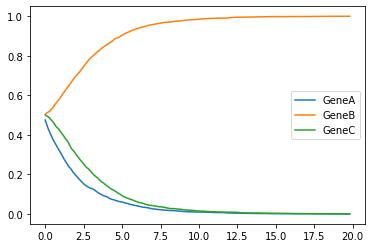

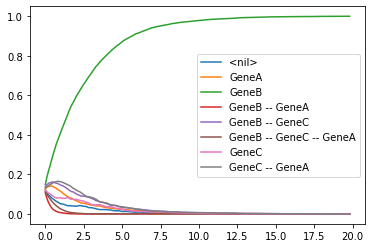

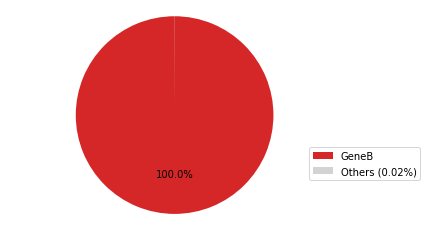

In [11]:
## Visualize the results

## Trajectories of node probabilities
run_model_maboss_random.get_nodes_probtraj().plot(legend=True)

## Trajectories of model states
run_model_maboss_random.get_states_probtraj().plot(legend=True)

## As a pie chart
run_model_maboss_random.plot_piechart()

/Users/laurence/opt/miniconda3/envs/colosys/lib/python3.7/site-packages/maboss/results/baseresult.py:117: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only
  plot_fix_point(self.get_fptable(), axes, self.palette)
/Users/laurence/opt/miniconda3/envs/colosys/lib/python3.7/site-packages/maboss/figures.py:113: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  ax.pie(prob_list, labels=labels, colors=color_list)


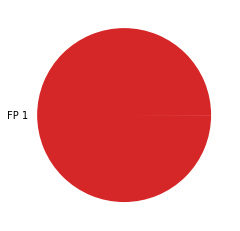

In [12]:
run_model_maboss_random.plot_fixpoint()


Simulations for different initial conditions as inputs ON 

In [13]:
## Model with different initial conditions
cond1 = model_maboss.copy()

## To test combinations of inputs, include all lines
cond1.network.set_istate('GeneB', [0,1])
cond1.network.set_istate('GeneA', [1,0])

In [14]:
## Visualize only the selected phenotypes
run_cond1 = cond1.run()

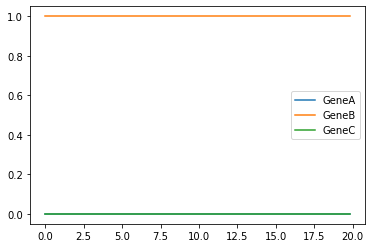

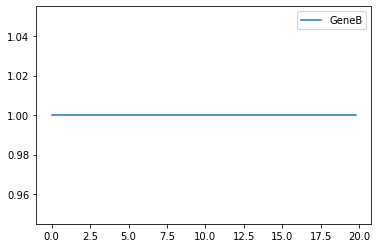

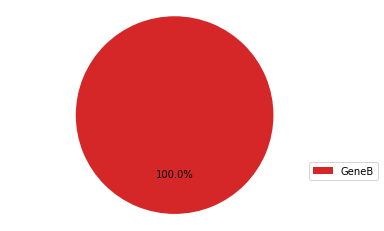

In [15]:
## Plot the trajectories
run_cond1.get_nodes_probtraj().plot(legend=True)
run_cond1.get_states_probtraj().plot(legend=True)

## Plot pie chart
run_cond1.plot_piechart()

## Mutant simulations 

What if the model is altered. How can we simulate mutations or increase gene expression with the model. We show below how to simulate a gain of function and a loss of function of a gene

#### Simulate gain of function

Text(0.5, 1.0, 'GeneC mutant')

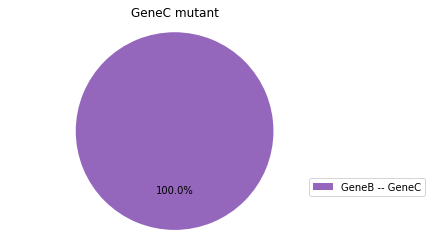

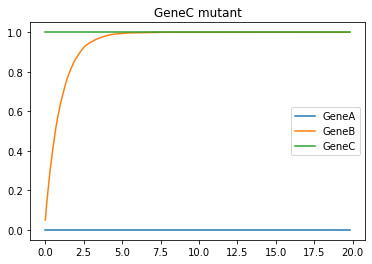

In [16]:
## Gain of function for GeneC
mut_GeneC_ON = model_maboss.copy()
mut_GeneC_ON.mutate("GeneC", "ON")
mutres_GeneC_ON = mut_GeneC_ON.run()
mutres_GeneC_ON.plot_piechart()
plt.title('GeneC mutant')
mutres_GeneC_ON.get_nodes_probtraj().plot(legend=True)
plt.title('GeneC mutant')


#### Simulate loss of function 

Text(0.5, 1.0, 'GeneC mutant')

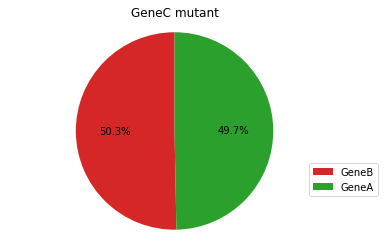

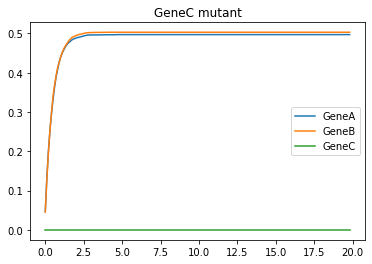

In [17]:
## Loss of function for GeneC
mut_GeneC_OFF = model_maboss.copy()
mut_GeneC_OFF.mutate("GeneC", "OFF")
mutres_GeneC_OFF = mut_GeneC_OFF.run()
mutres_GeneC_OFF.plot_piechart()
plt.title('GeneC mutant')
mutres_GeneC_OFF.get_nodes_probtraj().plot(legend=True)
plt.title('GeneC mutant')

The deletion of GeneC is equivalent to altering the negative circuit, leaving the systems dynamics to the regulation of the positive feedback loop.

Text(0.5, 1.0, 'GeneB mutant')

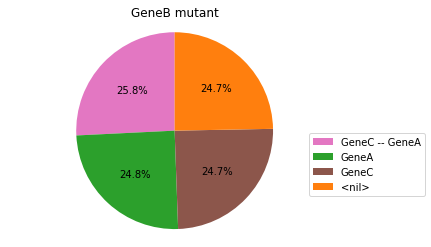

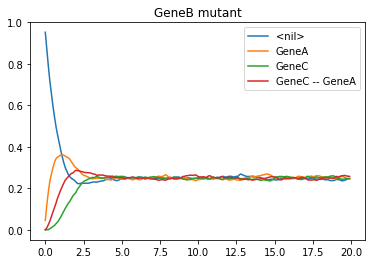

In [20]:
## Loss of function for GeneB
mut_GeneB_OFF = model_maboss.copy()
mut_GeneB_OFF.mutate("GeneB", "OFF")
mutres_GeneB_OFF = mut_GeneB_OFF.run()
mutres_GeneB_OFF.plot_piechart()
plt.title('GeneB mutant')
mutres_GeneB_OFF.get_states_probtraj().plot(legend=True)
plt.title('GeneB mutant')

The deletion of GeneB is equivalent to altering the positive feedback loop, leaving the systems dynamics regulated by the negative feedback loop and the limit cycle oscillations